In [1]:
from pynq import Overlay
Overlay("base.bit").download()

In [2]:
# monitor configuration: 640*480 @ 60Hz
from pynq.drivers.video import HDMI
hdmi_out = HDMI('out', video_mode=HDMI.VMODE_640x480)
hdmi_out.start()

In [3]:
# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080
# camera (input) configuration
frame_in_w = 640
frame_in_h = 480

In [4]:
# initialize camera from OpenCV
from pynq.drivers.video import Frame
import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("capture device is open: " + str(videoIn.isOpened()))

capture device is open: True


In [5]:
# Capture webcam image
import numpy as np

ret, frame_vga = videoIn.read()

# Display webcam image via HDMI Out
if (ret):
    frame_1080p = np.zeros((1080,1920,3)).astype(np.uint8)       
    frame_1080p[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    hdmi_out.frame_raw(bytearray(frame_1080p.astype(np.int8)))
else:
    print("Error while reading from camera")

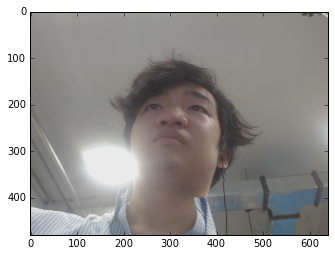

In [6]:
# Output webcam image as JPEG
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(frame_vga[:,:,[2,1,0]])
plt.show()

In [7]:
import cv2

np_frame = frame_vga

face_cascade = cv2.CascadeClassifier(
                        './data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
                        './data/haarcascade_eye.xml')

gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = np_frame[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [8]:
from pynq.drivers import Audio
if len(faces) > 0:
    pAudio.load("/home/xilinx/pynq/my_recording.pdm")
    pAudio.play()

In [9]:
# Output OpenCV results via HDMI
frame_1080p[0:480,0:640,:] = frame_vga[0:480,0:640,:]
hdmi_out.frame_raw(bytearray(frame_1080p.astype(np.int8)))

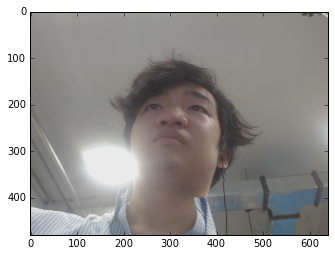

In [10]:
# Output OpenCV results via matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(np_frame[:,:,[2,1,0]])
plt.show()

In [11]:
videoIn.release()
hdmi_out.stop()
del hdmi_out